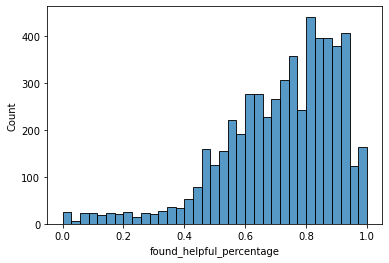

In [19]:
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns

df_train = pd.read_csv('../processed_data/train_meta_inc.csv')
ax = sns.histplot(data=df_train, x='found_helpful_percentage');

In [2]:
df_train.found_helpful_percentage.max(), df_train.found_helpful_percentage.min()

(1.0, 0.0)

In [15]:
bins = [ax.patches[i].get_x() for i in range(len(ax.patches))]
bins.append(bins[-1]+bins[1]-bins[0])
bin_size = bins[1]-bins[0]
bin_size

0.02857142857142857

In [25]:
df_train['bin_num'] = np.int64(np.ceil(df_train.found_helpful_percentage/bin_size))
df_train[['found_helpful_percentage', 'bin_num']]

,found_helpful_percentage,bin_num
0,0.879599,31
1,0.903543,32
2,0.882438,31
3,0.856283,30
4,0.861206,31
...,...,...
5562,0.454545,16
5563,0.454545,16
5564,0.454545,16
5565,0.454545,16


In [37]:
bin_counts = dict(df_train.bin_num.value_counts())
max_count = max(bin_counts.values())
df_train['sample_weight'] = df_train.bin_num.apply(lambda x: max_count/bin_counts[x])
display(df_train[['found_helpful_percentage', 'sample_weight']])
df_train[['sample_weight']].to_csv('../processed_data/train_sample_weight.csv', index=False)

,found_helpful_percentage,sample_weight
0,0.879599,1.361194
1,0.903543,1.203166
2,0.882438,1.361194
3,0.856283,1.000000
4,0.861206,1.361194
...,...,...
5562,0.454545,5.846154
5563,0.454545,5.846154
5564,0.454545,5.846154
5565,0.454545,5.846154
